## Python version

In [56]:
from platform import python_version
print(python_version())

3.7.7


In [57]:
!pip install -q tensorflow==2.0.0-beta1

## Import Libraries

In [58]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import preprocessing
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
import numpy as np

## CNN (Convolutional Neural Network) configuration

In [59]:
classifier = Sequential()

# Convolution - extracting appropriate features from the input image.
# Non-Linearity (RELU) - replacing all negative pixel values in feature map by zero.

classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3),
               activation='relu'))

# Pooling: reduces dimensionality of the feature maps but keeps the most important information.

classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer and flattening in order to arrange 3D volumes into a 1D vector.

classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())

# Fully connected layers: ensures connections to all activations in the previous layer.

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

## Classifier Training

In [60]:
classifier.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator
train_imagedata = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
        zoom_range=0.2, horizontal_flip=True)
test_imagedata = ImageDataGenerator(rescale=1. / 255)
training_set = \
    train_imagedata.flow_from_directory('data/training_set'
        , target_size=(64, 64), batch_size=32, class_mode='binary')
val_set = \
    test_imagedata.flow_from_directory('data/val_set'
        , target_size=(64, 64), batch_size=32, class_mode='binary')
history=classifier.fit_generator(training_set, steps_per_epoch=30, epochs=30,
                         validation_data=val_set,
                         validation_steps=30)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/30
30/30 [==============================] - 11s 364ms/step - loss: 0.4325 - accuracy: 0.7802 - val_loss: 0.1932 - val_accuracy: 0.9250
Epoch 2/30
30/30 [==============================] - 10s 317ms/step - loss: 0.2292 - accuracy: 0.9021 - val_loss: 0.7270 - val_accuracy: 0.7750
Epoch 3/30
30/30 [==============================] - 10s 320ms/step - loss: 0.1704 - accuracy: 0.9396 - val_loss: 0.3958 - val_accuracy: 0.8500
Epoch 4/30
30/30 [==============================] - 10s 319ms/step - loss: 0.1024 - accuracy: 0.9625 - val_loss: 0.5294 - val_accuracy: 0.8250
Epoch 5/30
30/30 [==============================] - 10s 326ms/step - loss: 0.0732 - accuracy: 0.9771 - val_loss: 0.3394 - val_accuracy: 0.8500
Epoch 6/30
30/30 [==============================] - 10s 325ms/step - loss: 0.0528 - accuracy: 0.9823 - val_loss: 0.7055 - val_accuracy: 0.8500
Epoch 7/30
30/30 [==============================] - 10s 325ms

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


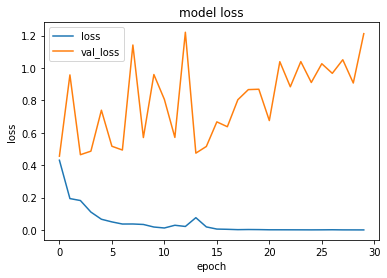

In [20]:
# Plot training and validation loss/accuracy
import matplotlib.pyplot as plt
print(history.history.keys())
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

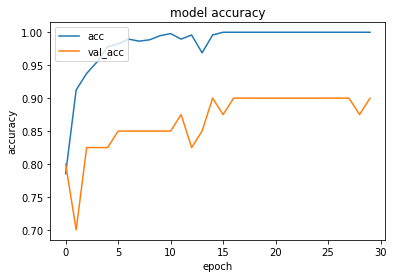

In [21]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

## Setting up a data augmentation configuration via ImageDataGenerator

In [22]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [23]:
import os, shutil
train_cars_dir = 'data/training_set/cars'

In [24]:
fnames = [os.path.join(train_cars_dir, fname) for
         fname in os.listdir(train_cars_dir)]

In [25]:
fnames

['data/training_set/cars\\all-wheel-drive-299772__340.jpg',
 'data/training_set/cars\\amg-1880381__340.jpg',
 'data/training_set/cars\\amsterdam-916561__340.jpg',
 'data/training_set/cars\\asphalt-3679117__340.jpg',
 'data/training_set/cars\\aston-2118857__340.jpg',
 'data/training_set/cars\\aston-2119120__340.jpg',
 'data/training_set/cars\\audi-1151768__340.jpg',
 'data/training_set/cars\\audi-1890494__340.jpg',
 'data/training_set/cars\\audi-798530__340.jpg',
 'data/training_set/cars\\auto-1327801__340.jpg',
 'data/training_set/cars\\auto-1399087__340.jpg',
 'data/training_set/cars\\auto-1515462__340.jpg',
 'data/training_set/cars\\auto-2179220__340.jpg',
 'data/training_set/cars\\auto-2823855__340.jpg',
 'data/training_set/cars\\auto-3302898__340.jpg',
 'data/training_set/cars\\auto-383897__340.jpg',
 'data/training_set/cars\\auto-788747__340.jpg',
 'data/training_set/cars\\auto-racing-558089__340.jpg',
 'data/training_set/cars\\automobile-1209732__340.jpg',
 'data/training_set/car

In [26]:
img_path = fnames[3]

In [27]:
img = image.load_img(img_path, target_size=(64, 64))

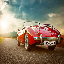

In [28]:
img

In [29]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
x

array([[[[236., 225., 205.],
         [216., 204., 178.],
         [202., 197., 168.],
         ...,
         [ 45.,  62.,  56.],
         [ 47.,  62.,  55.],
         [ 47.,  58.,  52.]],

        [[243., 231., 209.],
         [225., 215., 190.],
         [204., 194., 167.],
         ...,
         [ 47.,  63.,  60.],
         [ 48.,  63.,  58.],
         [ 47.,  60.,  53.]],

        [[245., 230., 209.],
         [247., 239., 218.],
         [214., 204., 179.],
         ...,
         [ 46.,  62.,  61.],
         [ 48.,  63.,  60.],
         [ 46.,  61.,  56.]],

        ...,

        [[ 91.,  65.,  42.],
         [ 89.,  63.,  40.],
         [ 79.,  52.,  31.],
         ...,
         [122.,  97.,  77.],
         [ 51.,  29.,   8.],
         [ 49.,  27.,   6.]],

        [[ 67.,  41.,  18.],
         [ 78.,  52.,  29.],
         [ 81.,  54.,  35.],
         ...,
         [ 65.,  38.,  19.],
         [ 61.,  36.,  16.],
         [ 64.,  37.,  18.]],

        [[ 82.,  55.,  34.],
       

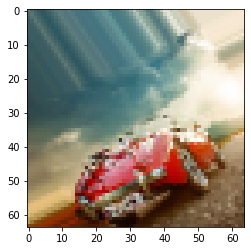

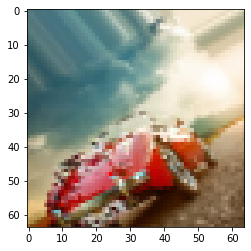

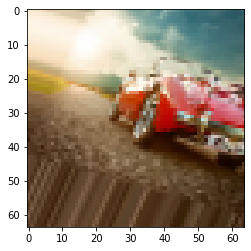

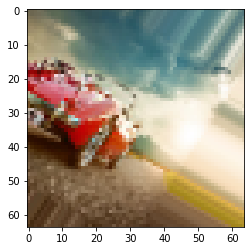

In [30]:
# Remixing existing information

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

### Trainable attribute set to False in order to freeze the convolutional base - this is done to prevent weights from updating during training

In [31]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64,64,3))

conv_base.trainable=False

58892288/58889256 [==============================] - 60s 1us/step


In [32]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [33]:
model = tf.keras.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [35]:
train_dir = 'data/training_set'
validation_dir = 'data/val_set'

In [36]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

In [37]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [38]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=30)

Epoch 1/30
30/30 [==============================] - 15s 489ms/step - loss: 0.4312 - acc: 0.8062 - val_loss: 0.5009 - val_acc: 0.7750
Epoch 2/30
30/30 [==============================] - 13s 450ms/step - loss: 0.3139 - acc: 0.8698 - val_loss: 0.4812 - val_acc: 0.8250
Epoch 3/30
30/30 [==============================] - 13s 450ms/step - loss: 0.2709 - acc: 0.8969 - val_loss: 0.4262 - val_acc: 0.8250
Epoch 4/30
30/30 [==============================] - 13s 446ms/step - loss: 0.2444 - acc: 0.8979 - val_loss: 0.4045 - val_acc: 0.8250
Epoch 5/30
30/30 [==============================] - 13s 443ms/step - loss: 0.2157 - acc: 0.9115 - val_loss: 0.3451 - val_acc: 0.8000
Epoch 6/30
30/30 [==============================] - 13s 449ms/step - loss: 0.2009 - acc: 0.9198 - val_loss: 0.3495 - val_acc: 0.8000
Epoch 7/30
30/30 [==============================] - 14s 450ms/step - loss: 0.2093 - acc: 0.9198 - val_loss: 0.3373 - val_acc: 0.8500
Epoch 8/30
30/30 [==============================] - 14s 457ms/step - 

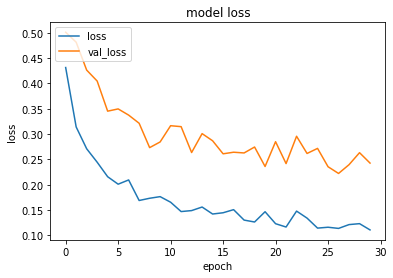

In [39]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

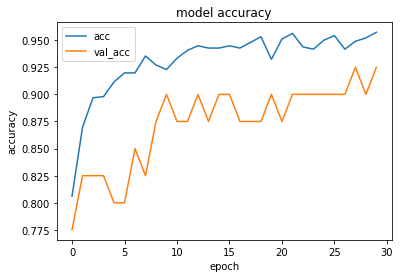

In [40]:
# Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

## Generate predictions

In [41]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('data/test/photo-1430402393301-f3b159a7a65a.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[1.]], dtype=float32)

In [42]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1542362567-b07e54358753.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [43]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1541443131876-44b03de101c5.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [44]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1532974297617-c0f05fe48bff.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [45]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1520340356584-f9917d1eea6f.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [46]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1519641471654-76ce0107ad1b.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [47]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('data/test/photo-1512289984044-071903207f5e.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[1.]], dtype=float32)

In [48]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1511919884226-fd3cad34687c.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [49]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1502877338535-766e1452684a.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [50]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('data/test/photo-1498423281417-af8aff4579dc.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[1.]], dtype=float32)

In [51]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1494905998402-395d579af36f.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [52]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('data/test/photo-1489824904134-891ab64532f1.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

In [53]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('data/test/photo-1483375801503-374c5f660610.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[1.]], dtype=float32)

In [54]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('data/test/photo-1475088092121-b7d3cd6e1482.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[1.]], dtype=float32)

In [55]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('data/test/photo-1473862170180-84427c485aca.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[1.]], dtype=float32)